**2. Data Preprocessing
Step 1: Load and Inspect the Data**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('personality-data.csv')

# Initial inspection
print(df.head())
print(df.info())
print(df.describe())

                             userid   openness   agreeableness  \
0  8e7cebf9a234c064b75016249f2ac65e        5.0             2.0   
1  77c7d756a093150d4377720abeaeef76        7.0             4.0   
2  b7e8a92987a530cc368719a0e60e26a3        4.0             3.0   
3  92561f21446e017dd6b68b94b23ad5b7        5.5             5.5   
4  030001ac2145a938b07e686a35a2d638        5.5             5.5   

    emotional_stability   conscientiousness   extraversion  assigned metric  \
0                   3.0                 2.5            6.5      serendipity   
1                   6.0                 5.5            4.0              all   
2                   4.5                 2.0            2.5      serendipity   
3                   4.0                 4.5            4.0       popularity   
4                   3.5                 4.5            2.5       popularity   

   assigned condition   movie_1   predicted_rating_1  ...   movie_9  \
0                high     77658             4.410466  ...

**Step 2: Handle Missing Values**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# If any missing values exist:
# df = df.dropna()  # for rows with missing values
# or impute with mean/median

userid                  0
 openness               0
 agreeableness          0
 emotional_stability    0
 conscientiousness      0
 extraversion           0
 assigned metric        0
 assigned condition     0
 movie_1                0
 predicted_rating_1     0
 movie_2                0
 predicted_rating_2     0
 movie_3                0
 predicted_rating_3     0
 movie_4                0
 predicted_rating_4     0
 movie_5                0
 predicted_rating_5     0
 movie_6                0
 predicted_rating_6     0
 movie_7                0
 predicted_rating_7     0
 movie_8                0
 predicted_rating_8     0
 movie_9                0
 predicted_rating_9     0
 movie_10               0
 predicted_rating_10    0
 movie_11               0
 predicted_rating_11    0
 movie_12               0
 predicted_rating_12    0
 is_personalized        0
 enjoy_watching         0
dtype: int64


**Step 3: Feature Engineering**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('personality-data.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verify we have the expected columns
print("Available columns:", df.columns.tolist())

# Define personality traits - adjust based on actual column names
personality_traits = ['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']

# Check if all traits exist in DataFrame
missing = [trait for trait in personality_traits if trait not in df.columns]
if missing:
    print(f"Warning: Missing columns {missing}")
    # Remove missing traits or handle appropriately
    personality_traits = [trait for trait in personality_traits if trait in df.columns]

# Only proceed if we have at least some traits
if personality_traits:
    # Scale the traits
    scaler = StandardScaler()
    df[personality_traits] = scaler.fit_transform(df[personality_traits])

    print("Scaling completed successfully")
else:
    print("No valid personality traits found to scale")

Available columns: ['userid', 'openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion', 'assigned_metric', 'assigned_condition', 'movie_1', 'predicted_rating_1', 'movie_2', 'predicted_rating_2', 'movie_3', 'predicted_rating_3', 'movie_4', 'predicted_rating_4', 'movie_5', 'predicted_rating_5', 'movie_6', 'predicted_rating_6', 'movie_7', 'predicted_rating_7', 'movie_8', 'predicted_rating_8', 'movie_9', 'predicted_rating_9', 'movie_10', 'predicted_rating_10', 'movie_11', 'predicted_rating_11', 'movie_12', 'predicted_rating_12', 'is_personalized', 'enjoy_watching']
Scaling completed successfully


**3. Exploratory Data Analysis (EDA)
Step 1: Personality Traits Distribution**

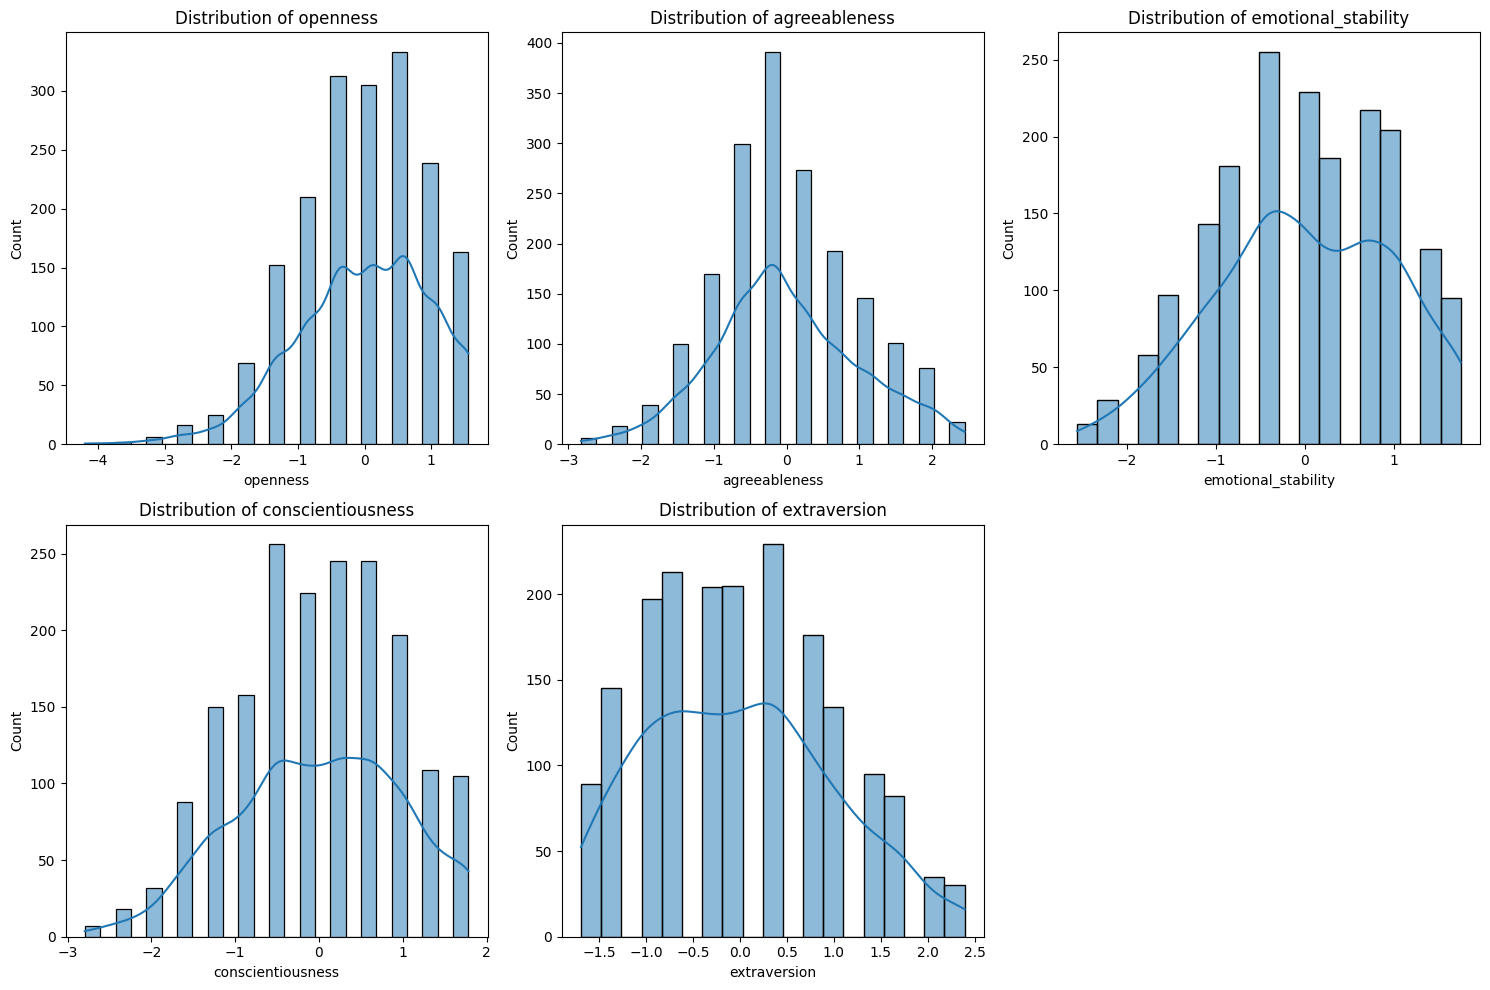

In [ ]:
# Plot distributions of personality traits
plt.figure(figsize=(15, 10))
for i, trait in enumerate(personality_traits, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[trait], kde=True)
    plt.title(f'Distribution of {trait}')
plt.tight_layout()
plt.show()

**Step 2: Correlation Analysis**

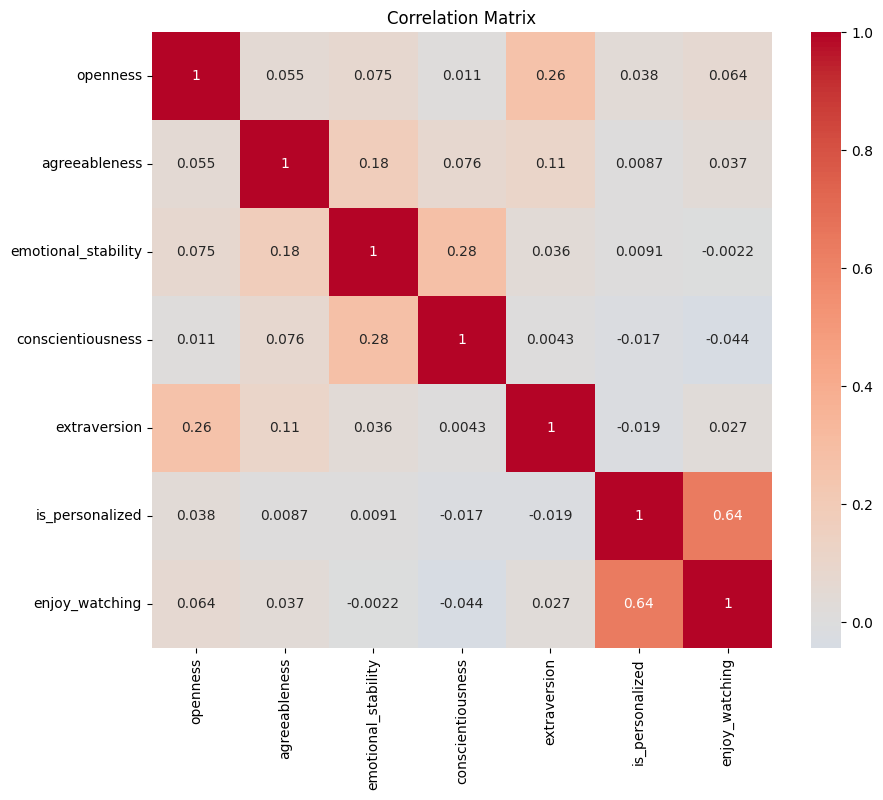

In [ ]:
# Correlation matrix
corr_matrix = df[personality_traits + ['is_personalized', 'enjoy_watching']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Step 3: Visualize Relationships**

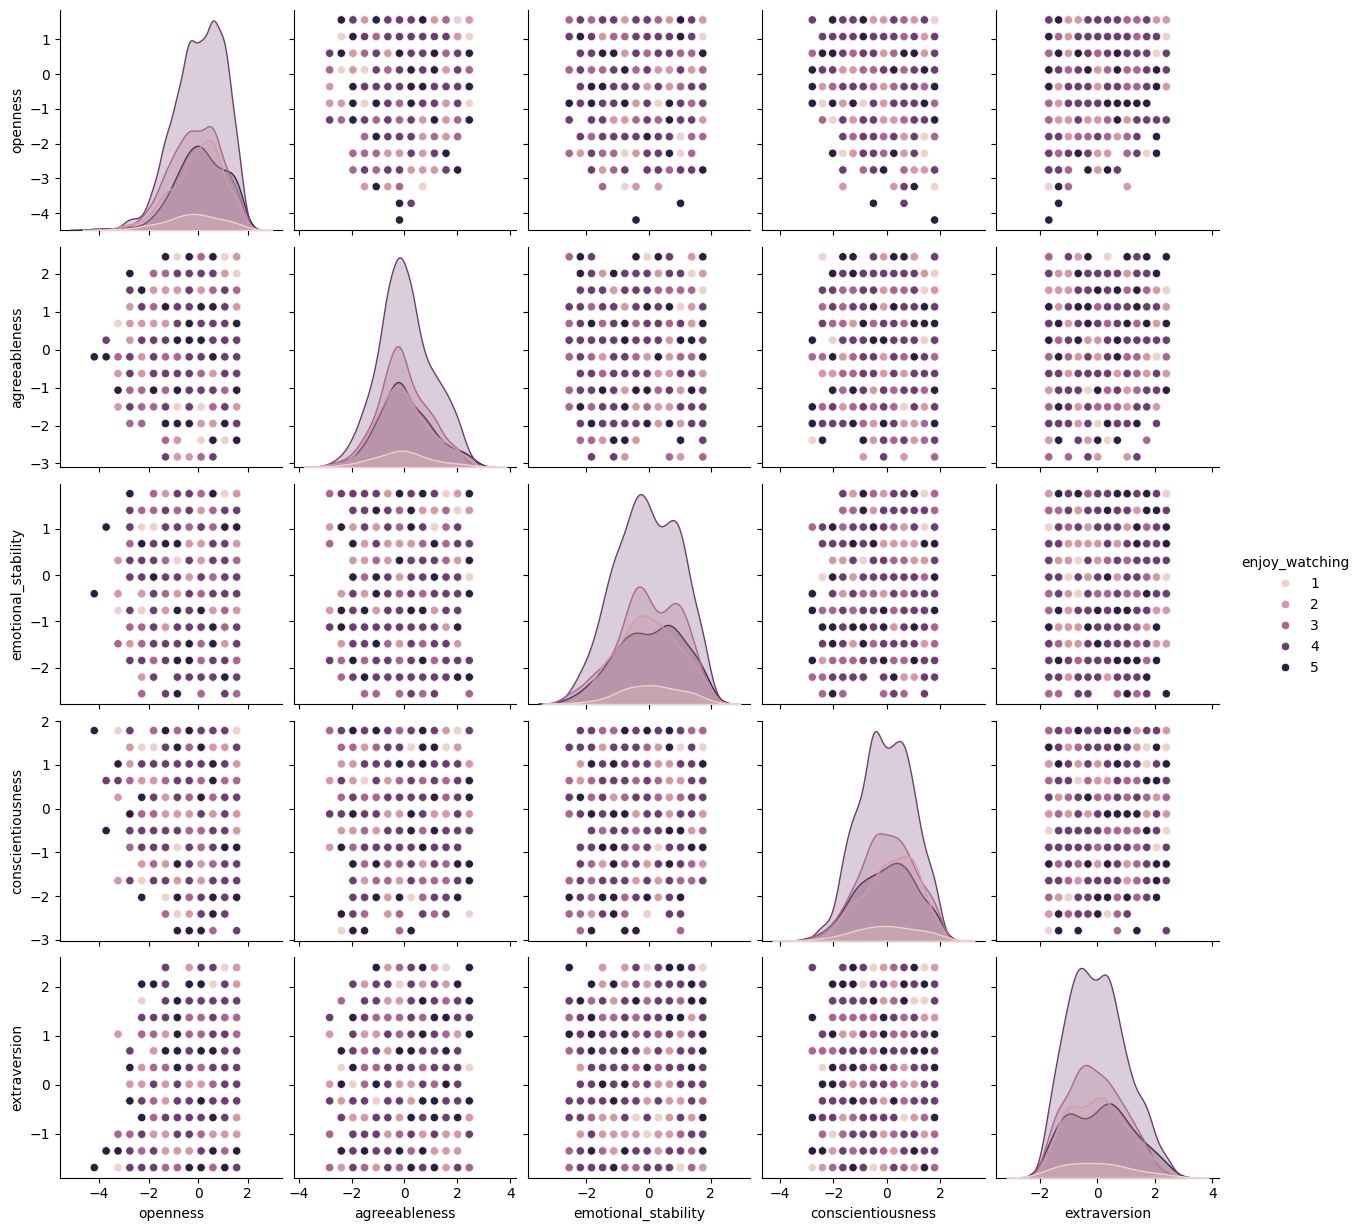

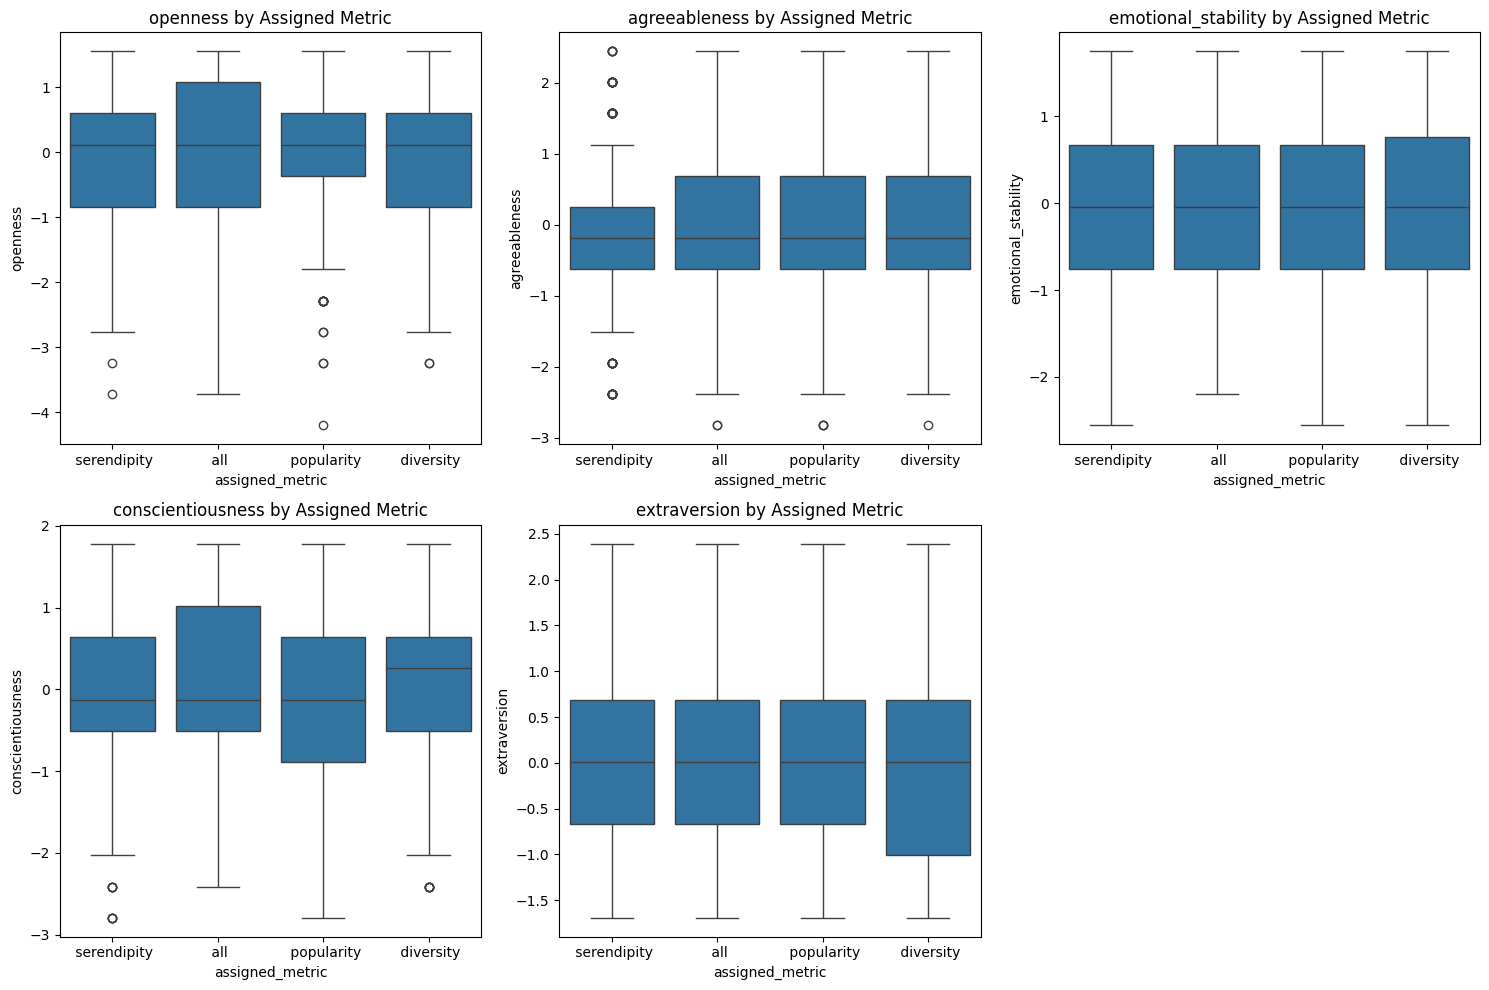

In [ ]:
# Pairplot of personality traits colored by enjoy_watching
sns.pairplot(df, vars=personality_traits, hue='enjoy_watching')
plt.show()

# Boxplots of personality traits by assigned metric
plt.figure(figsize=(15, 10))
for i, trait in enumerate(personality_traits, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='assigned_metric', y=trait, data=df)
    plt.title(f'{trait} by Assigned Metric')
plt.tight_layout()
plt.show()

**4. Classification Tasks
Task 1: Predict Assigned Metric from Personality Traits**

Accuracy: 0.3405994550408719
              precision    recall  f1-score   support

         all       0.24      0.13      0.17        39
   diversity       0.31      0.36      0.33       101
  popularity       0.33      0.39      0.36       112
 serendipity       0.42      0.35      0.38       115

    accuracy                           0.34       367
   macro avg       0.32      0.31      0.31       367
weighted avg       0.34      0.34      0.34       367



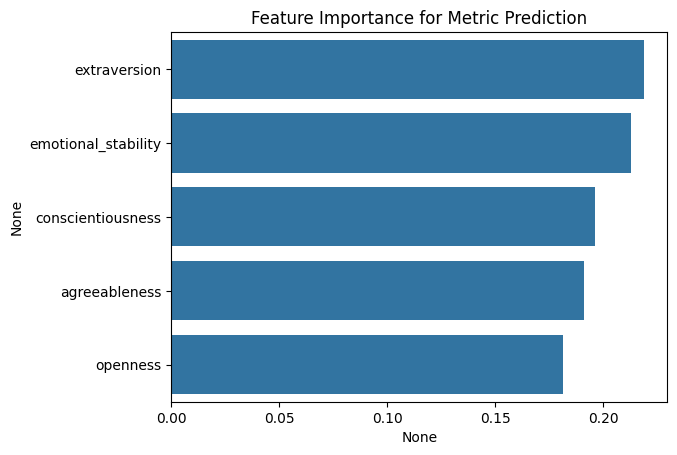

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare data
X = df[personality_traits]
y = df['assigned_metric']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=personality_traits).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance for Metric Prediction')
plt.show()

**Task 2: Predict Enjoyment Rating from Personality Traits**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Prepare data
X = df[personality_traits]
y = df['enjoy_watching']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (using Gradient Boosting as it often works well for ordinal data)
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluate
y_pred = gb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.40599455040871935
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.09      0.02      0.03        60
           3       0.20      0.13      0.16        62
           4       0.46      0.84      0.60       162
           5       0.19      0.06      0.10        63

    accuracy                           0.41       367
   macro avg       0.19      0.21      0.18       367
weighted avg       0.28      0.41      0.31       367



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**5. Clustering Analysis
Step 1: Determine Optimal Number of Clusters (K-means)**

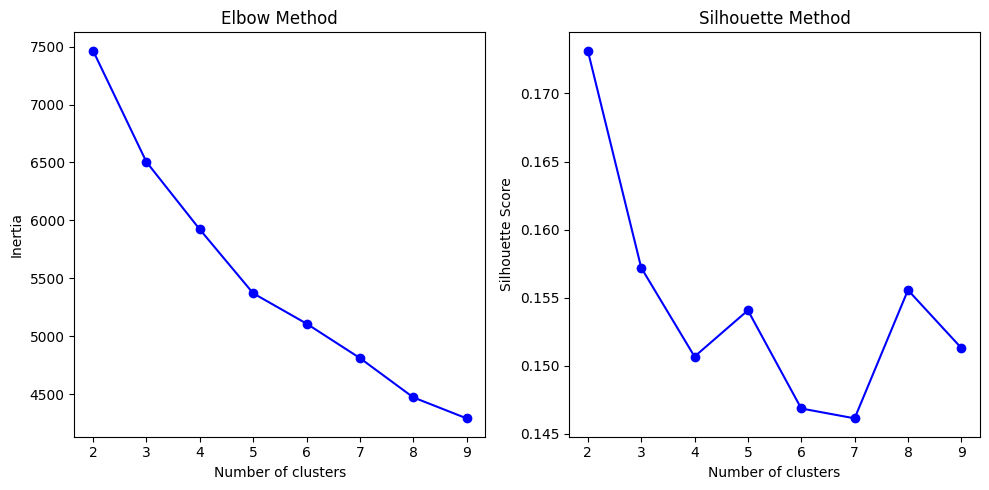

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize data
X_cluster = df[personality_traits]

# Find optimal k using elbow method and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.tight_layout()
plt.show()

**Step 2: Perform Clustering with Optimal K**

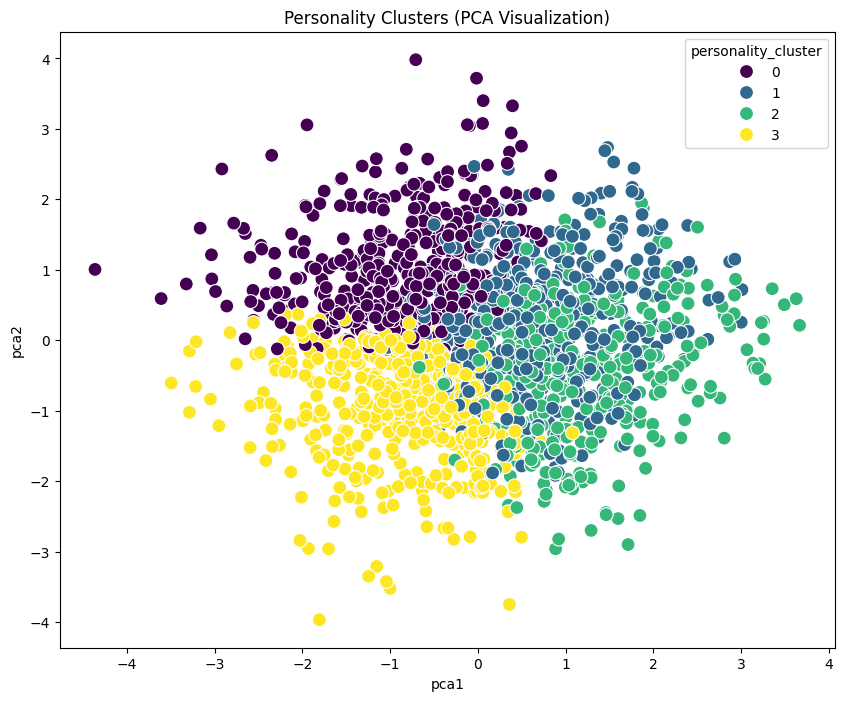

In [ ]:
# Based on the plots, choose optimal k (let's assume k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['personality_cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_cluster)
df['pca1'] = principal_components[:, 0]
df['pca2'] = principal_components[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='personality_cluster', data=df, palette='viridis', s=100)
plt.title('Personality Clusters (PCA Visualization)')
plt.show()

**Step 3: Analyze Cluster Characteristics**

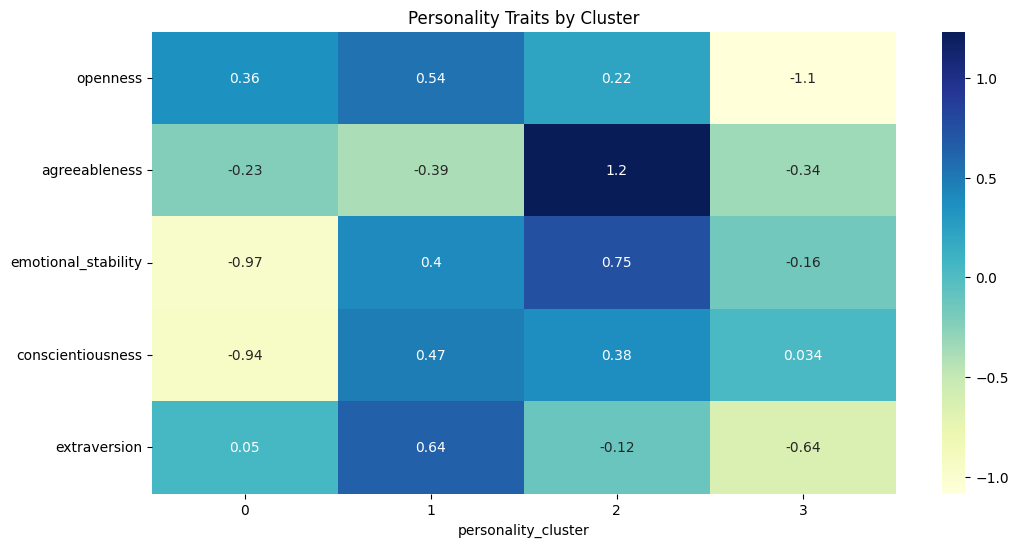

                     is_personalized  enjoy_watching
personality_cluster                                 
0                           3.034404        3.610092
1                           3.058824        3.480076
2                           3.140625        3.580729
3                           3.008214        3.427105
personality_cluster  assigned_metric
0                    popularity         0.350917
                     serendipity        0.298165
                     diversity          0.240826
                     all                0.110092
1                    popularity         0.299810
                     serendipity        0.299810
                     diversity          0.269450
                     all                0.130930
2                    diversity          0.338542
                     popularity         0.330729
                     serendipity        0.231771
                     all                0.098958
3                    serendipity        0.318275
        

In [ ]:
# Group by cluster and analyze mean personality traits
cluster_means = df.groupby('personality_cluster')[personality_traits].mean()

# Visualize cluster profiles
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='YlGnBu')
plt.title('Personality Traits by Cluster')
plt.show()

# Analyze other metrics by cluster
print(df.groupby('personality_cluster')[['is_personalized', 'enjoy_watching']].mean())
print(df.groupby('personality_cluster')['assigned_metric'].value_counts(normalize=True))

**Advanced Analysis: Recommendation System Evaluation**
**1: Evaluate if Personality Affects Enjoyment**

In [ ]:

from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA test
model = ols('enjoy_watching ~ C(assigned_metric) + openness + agreeableness + emotional_stability + conscientiousness + extraversion', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq      df         F    PR(>F)
C(assigned_metric)      4.240436     3.0  1.266777  0.284186
openness                6.957270     1.0  6.235191  0.012611
agreeableness           2.682431     1.0  2.404028  0.121197
emotional_stability     0.001343     1.0  0.001204  0.972325
conscientiousness       4.572207     1.0  4.097669  0.043088
extraversion            0.154455     1.0  0.138424  0.709896
Residual             2036.347585  1825.0       NaN       NaN


RMSE: 0.9007327128227817


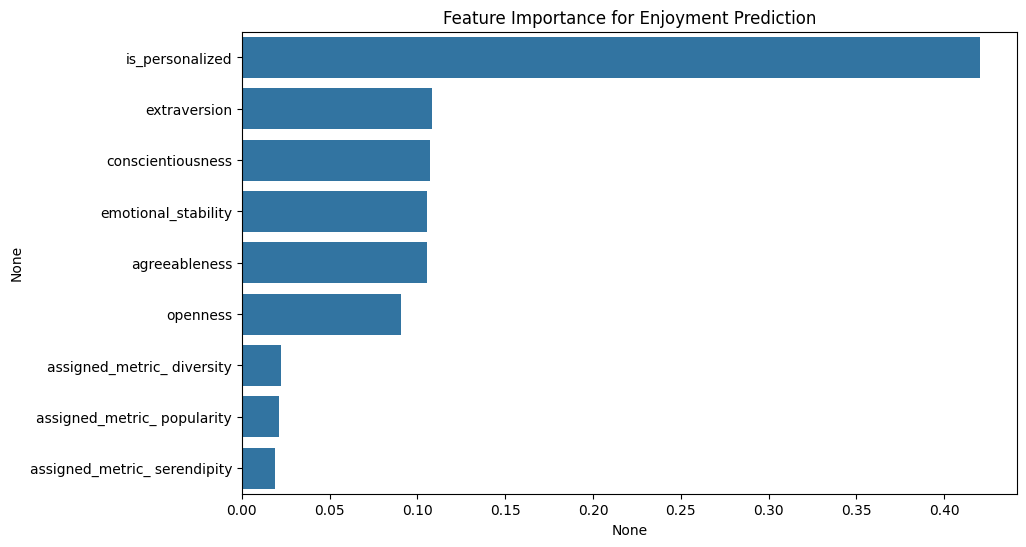

In [ ]:
#Step 2: Build a Predictive Model for Enjoyment
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data
X = df[personality_traits + ['assigned_metric', 'is_personalized']]
X = pd.get_dummies(X, columns=['assigned_metric'], drop_first=True)
y = df['enjoy_watching']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Evaluate
y_pred = reg.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
feature_imp = pd.Series(reg.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance for Enjoyment Prediction')
plt.show()